# Introduction
In a series of weekly articles, I will be covering some important topics of statistics with a twist.

The goal is to use Python to help us get intuition on complex concepts, empirically test theoretical proofs, or build algorithms from scratch. In this series, you will find articles covering topics such as random variables, sampling distributions, confidence intervals, significance tests, and more.

At the end of each article, you can find exercises to test your knowledge. The solutions will be shared in the article of the following week.

Articles published so far:
- [Bernoulli and Binomial Random Variables with Python](https://towardsdatascience.com/bernoulli-and-binomial-random-variables-d0698288dd36)
- [From Binomial to Geometric and Poisson Random Variables with Python](https://towardsdatascience.com/geometric-and-poisson-random-variables-with-python-e5dcb63d6b55)
- Sampling Distribution with Python

As usual the code is available on my [GitHub](https://github.com/luisroque/College_Statistics_with_Python).

# Sampling Distribution

We often find ourselves wanting to estimate a parameter for a population, for instance, its mean or standard deviation. Usually we cannot collect data from the overall population. In this case, the only way for us to estimate the parameters of our population is by random sampling from it. We define the size of the sample $n$ and calculate a statistic for each sample. This statistic is what we use to calculate the parameter of the overall population. Notice that because it is a random sample, the statistic that we calculate for each random sample could be far from the population value. That is why we perform this process a series of times, which we can call trials.

Let's define a very simple example. We have a population of 100 athletes with numbered shirts with distinct values from 0 to 99. First we calculate the parameters for our population, $\mu$ and $\sigma$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns

In [2]:
X = np.random.choice(np.arange(0, 100), 100, replace=False)
print(f'μ={X.mean()}')
print(f'σ={X.std()}')

μ=49.5
σ=28.86607004772212


We take 100 random samples of size 5.

In [3]:
rs = []
for i in range(100):
    rs.append(np.random.choice(X, 5))
rs = np.array(rs)

In [4]:
# 5 examples of our random samples

rs[:5]

array([[87, 73, 61, 91, 99],
       [10,  5, 46, 72, 92],
       [ 1,  3,  7, 59, 88],
       [ 1, 42, 87, 21, 42],
       [65,  9, 54, 88, 67]])

For each one we calculate some statistic, in this case would be the sample mean $\bar x$. $\bar x$ is an array of 100 values (the mean value of each sample). Let's print the first 5 values and then plot an histogram to have a better idea of the shape of the sampling distribution. In fact, this is the **sampling distribution of the sample mean for sample size equal to 5**.

[82.2 45.  31.6 38.6 56.6]


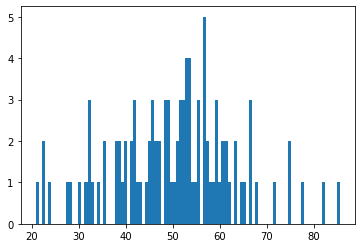

In [5]:
x_bar = rs.mean(axis=1)
print(x_bar[:5])
plt.hist(x_bar, bins=100);

# Sampling Distribution of Sample Proportion

We are going to start this section by creating two Random Variables (RV), a Bernoulli RV and Binomial RV (if you are unfamiliar with the details please see my previous articles from this series). 

The problem at hand is the following, there are 20,000 distinct universes where Rick and Morty live and we want to calculate the proportion of Mortys that we can find if we visit one random universe. Let $X$ be the following Bernoulli RV: 

$$ X=   \left\{
\begin{array}{ll}
      1, \quad \text{if we find Morty} \\
      0, \quad \text{if we don't find Morty} \\
\end{array} 
\right.  $$

We already saw in a past article that $\mu_X = p$ and $\sigma_X=\sqrt{p \cdot (1-p)}$.

Now, let's define a new RV, which is equal to the sum of 10 independent trials of $X$. This is a Binomial RV with $\mu_Y=n \cdot p$ and $\sigma_Y = \sqrt{n \cdot p \cdot(1-p)}$.

Now it is time randomly visit some universes and look for Morty there. Imagine that we visit 10 universes each time, which are indeed samples that we are taking from the overall population of universes. Notice that we can consider these samples independent even if we choose distinct universes for the sample of 10. This is due to very small number of samples compared to the population. There is in fact a 10% rule to assume independence in a random sampling without replacement from a population of certain size.

Time to look for Morty.

In [6]:
p = 0.6
n = 10
X = bernoulli(p)
Y = [X.rvs(n) for i in range(10000)]

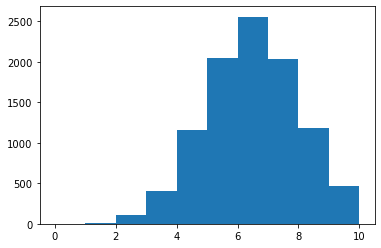

In [7]:
plt.hist(np.sum(Y, axis=1));

And there you go, this is the sampling distribution of the sampling proportion. How can we calculate its mean and standard deviation? The expected value for your sample proportion is the proportion of Mortys that we find in our visits, which shows that it is a unbised estimation for the population parameter. In the same way, the standard deviation of the sample proportion is the standard deviation of our binomial random variable $Y$ divided by $n$.

$$\begin{align}
\mu_{\hat p}&=\frac{\mu_Y}{n} = p \\
\sigma_{\hat p} &=\frac{\sigma_Y}{n} = \frac{\sqrt{n \cdot p \cdot (1-p)}}{n} = \sqrt{\frac{p \cdot (1-p)}{n}}
\end{align}$$

In [8]:
print('Empirically calculated expected value: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Theoretical expected value: {}'.format(p))

Empirically calculated expected value: 0.5977399999999999
Theoretical expected value: 0.6


In [9]:
print('Empirically calculated standard deviation: {}'.format(np.std(np.mean(Y, axis=1))))
print('Theoretical standard deviation: {}'.format(np.sqrt(p*(1-p)/n)))

Empirically calculated standard deviation: 0.15472844728749785
Theoretical standard deviation: 0.15491933384829668


There you go, we just arrive to very similar values. First, by performing a big number of trials of 10 visit tours to random universes. Secondly, by computing the theoretical values for this sampling distribution. In this article we will understand exactly why these two approaches yield similar results.

# Normality of the Sampling Distribution of Sample Proportion

There are two conditions to consider a sampling distribution approximately normal in its shape.

$$\begin{align}
n \cdot p \geq 10 \\
n \cdot(1-p) \geq 10
\end{align}$$

Let's try an example. You ran a music store and receive 100 new CDs every week (consider these to be a random sample). Your supplier states that they are delivering approximately 10% of Rock CDs. You calculate the weekly proportion of Rock CDs in the weekly sample.

In [90]:
n = 100
p = 0.1
print(n*p)
print(n*(1-p))

10.0
90.0


The conditions are met. Let's plot it and look at the resulting distribution.

In [91]:
X = bernoulli(p)
Y = [X.rvs(100) for i in range(10000)]

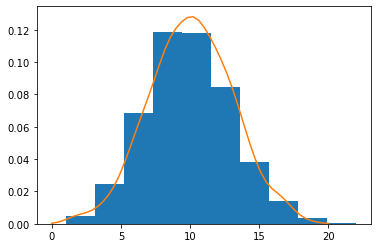

In [92]:
normal = np.random.normal(p*n, np.sqrt(n*p*(1-p)), (1000, ))
density = stats.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 20, 50), 
                   histtype=u'step', density=True) 
plt.close()

plt.hist(np.sum(Y, axis=1), density=True)
plt.plot(x, density(x));

Looks good and approximately normal. What if instead of a 10% probability of receiving Rock CDs we were informed that it changed to 3%?

In [93]:
n = 100
p_ = 0.03
print(n*p_)
print(n*(1-p_))

3.0
97.0


The first condition is not met.

In [94]:
X = bernoulli(p_)
Y_ = [X.rvs(100) for i in range(10000)]

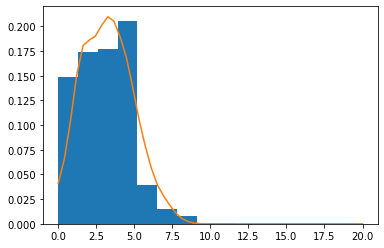

In [96]:
normal = np.random.normal(p_*n, np.sqrt(n*p_*(1-p_)), (1000, ))
density = stats.gaussian_kde(normal)
n_, x, _ = plt.hist(normal, bins=np.linspace(0, 20, 50), 
                   histtype=u'step', density=True) 
plt.close()

plt.hist(np.sum(Y_, axis=1), density=True)
plt.plot(x, density(x));

In fact our distribution is skewed to the right.

Why are these conditions important? These are relevant when we need to answer questions about the probability of sampling proportions. For example, returning to our example and considering the initial information of 10% probability of receiving Rock CDs. Consider that you find on your first trial that 12% of the CDs were Rock CDs. Assuming that the true proportion is the one informed by your supplier, what would be the probability that more than 12% of the sample you searched consists of Rock CDs?

We already know that the sampling distribution is approximately normal. We just need to build our normal distribution and compute $P(\hat p>0.12)$.

In [97]:
print('Empirically calculated expected value: {}'.format(np.mean(np.mean(Y, axis=1))))
print('Theoretical expected value: {}'.format(p))

Empirically calculated expected value: 0.09973800000000001
Theoretical expected value: 0.1


In [98]:
print('Empirically calculated standard deviation: {}'.format(np.std(np.mean(Y, axis=1))))
print('Theoretical standard deviation: {}'.format(np.sqrt(p*(1-p)/n)))

Empirically calculated standard deviation: 0.029996189024607777
Theoretical standard deviation: 0.030000000000000002


In [99]:
n = 100
p = 0.10
p_ = 0.12
print(f'P(p>0.12)={1-norm.cdf(p_, p, np.sqrt(p*(1-p)/n))}')

P(p>0.12)=0.252492537546923


# Inferring Population mean

In the first section, we have calculated the number o Mortys that we found in samples of our population of universes using two different approaches. The first by deriving the theoretical properties of a sampling distribution of sampling proportions. The second one by estimating the parameters using the statistics of the sampling distribution. In this section we will be understanding better the second approach.

Let's start by defining the population mean $\mu$:

$$\mu = \frac{\sum^N_{i=1}y_i}{N},$$

where $N$ represents the population size, or the 20,000 universes. The sample mean $\bar y$ can be defined as,

$$\bar y = \frac{\sum^n_{i=1}y_i}{n},$$

where $n$ represents the sample size, or one the simple random samples of size 10 that we have drawn from the overall population.

In [100]:
p = 0.6
n = 10
X = bernoulli(p)
Y = [X.rvs(n) for i in range(10000)]

In [101]:
# One random sample

y_bar = np.mean(Y[0])
y_bar

0.9

Notice that $\bar y$ is a statistic that we use to infer the population parameter. Nevertheless, these could be different as we are randomly taking samples from the population.

# Central Limit Theorem

We want to get the intuition on the Central Limit Theorem (CLT) and then we will get to its interest and applications. Let's define a distribution that is clearly non-normal.

In [102]:
elements = np.arange(6)
probabilities = [0.3, 0., 0.05, 0.05, 0.2, 0.4]
X = np.random.choice(elements, 100, p=probabilities)

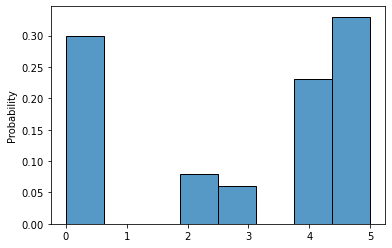

In [103]:
sns.histplot(X, stat='probability');

Now, we can draw samples from it. We are going to draw samples of size 4 and calculate its mean.

In [104]:
s_1 = np.random.choice(elements, 4, p=probabilities)
print(s_1)
x_bar_1 = np.mean(s_1)
print(x_bar_1)

[0 5 4 0]
2.25


Let's do the same procedure 10,000 times.

In [105]:
s = []
n=4
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.36
Skew: -0.27
---
μ=3.06
σ=1.06


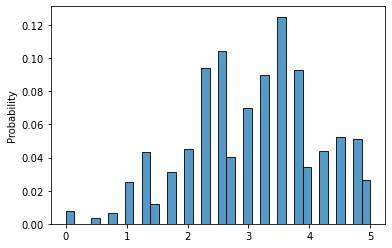

In [106]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

The distribution above does not look like our original distribution anymore. What the CTL tells us is that as you take more samples and calculate their mean, the resulting distribution will approximate a normal distribution. We can measure it by the value of the skeweness and kurtosis, which for a normal distribution should be zero. A positively skewed distribution has a tail to the right, while a negative one has a tail to the left. If the distribution has positive kurtosis it means that it has fatter tails than the normal distribution; conversely, in a negative scenario the tails would be thinner.


What the CLT also tells us is that the approximation becomes better as the sample size increases. Let's test it by increasing the sample size from 4 to 20 and then to 100.

In [107]:
s = []
n=20
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.1
Skew: -0.09
---
μ=3.06
σ=0.47


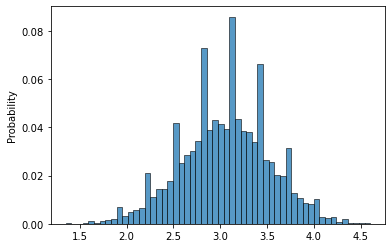

In [108]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

In [111]:
s = []
n=100
for i in range(10000):
    s.append(np.random.choice(elements, n, p=probabilities))
s = np.mean(np.asarray(s), axis=1)

Kurtosis: -0.08
Skew: -0.03
---
μ=3.05
σ=0.22


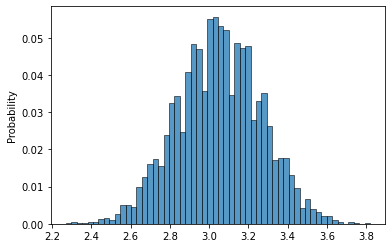

In [112]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
print('---')
print('μ=' + str(np.round(np.mean(s), 2)))
print('σ=' + str(np.round(np.std(s), 2)))
sns.histplot(s, stat='probability');

Notice how the last plot resembles a normal distribution. Also notice that the value of mean and standard deviation of the sampling distribution that we have been plotting for the different sample sizes. Not surprisingly, the mean is the same as the original distribution. But the value for the standard deviation is indeed strange, as it has been shrinking. In fact, this is an important property to take note: the standard deviation of our sampling distribution of sample means is the square root of the standard deviation of the original population divided by the sample size. We can write it as:

$$\sigma_{\bar x} = \sqrt{\frac{\sigma^2}{n}}$$

In [113]:
print("Theoretical value: " + str(np.sqrt(X.var()/n)))
print("Empirically computed: " + str(s.std()))

Theoretical value: 0.20789179878003847
Empirically computed: 0.2151977077573086


This process is not specific to the sample mean, we could be, for instance, calculate the sample sum.

In [114]:
s = []
for i in range(10000):
    s.append(np.random.choice(elements, 100, p=probabilities))
s = np.sum(np.asarray(s), axis=1)

Kurtosis: -0.04
Skew: -0.02


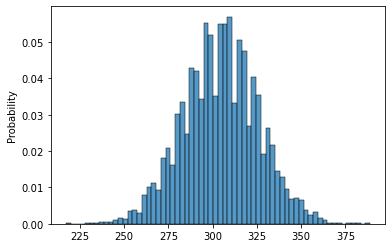

In [115]:
print('Kurtosis: ' + str(np.round(kurtosis(s),2)))
print('Skew: ' + str(np.round(skew(s),2)))
sns.histplot(s, stat='probability');

I hope that now you see why the normal distribution is so often used to model different processes. Even if you do not know the distribution of a process that you want to describe statistically, if you add or take the mean of your measurements (assuming that they all have the same distribution), suddenly you get a normal distribution.

# Exercises

You will get the solutions on next week's article.

1. Rick takes an SRS of 75 citizens in a distant planet to see what proportion of citizens sampled are satisfied with their standard of living. Suppose that 60% of the 1,000,000,000 citizens that live in the planet are satisfied with their standard of living.
What are the mean and standard deviation of the sampling distribution of the proportion of citizens who are satisfied with their standard of living?

2. A certain planet with over 1,000,000 households has a mean household income of \\$1,000,000 with a standard deviation of \\$150,000. Rick plans to take random samples of 700 households and calculate the sample mean income. Calculate the mean and standard deviation of the sampling distribution of $\bar x$.

3. Rick is performing quality control tests on different portal guns since there is some variability in the manufactoring process. A certain gun has a target thickness of 5mm. The distribution of thicknesses is skewed to the right with a mean of 5mm and a standard deviation of 1mm. A quality control check on this part involves taking a random sample of 35 points and calculating the mean thickness of those points. What is the shape of the sampling distribution of the sample mean thickness? What is the probability that the mean thickness in the sample is within 0.2mm of the target value?

### Answers from last week

In [33]:
def geomcdf_1(p, x):
    # implementing first approach
    prob = 0
    for i in range(x-1):
        prob+=p*(1-p)**i
    return prob

In [34]:
def geomcdf_2(p, x):
    # implementing second approach
    prob = 1-(1-p)**(x-1)
    return prob

1. You have a standard deck of cards and you are picking cards until you get a Queen (you replace the cards if they are not Queens). What is the probability that you need to pick 5 cards? And less than 10? And more than 12?

In [35]:
# Exactly 5

p = 4/52

p**1*(1-p)**4

0.055848076855744666

In [36]:
# Less than 10

geomcdf_2(p, 10)

0.5134348005963145

In [37]:
# More than 12

1 - geomcdf_2(p, 13)

0.3826967066770909

2. Jorge conducts inspections on freezers. He finds that 94% of the freezers successful pass the inspection. Let C be the number of freezers Jorge inspects until a freezer fails an inspection. Assume that the results of each inspection are independent.

In [38]:
# Our probability of success is actually the probability of failing the inspection

p=1-0.94
p**1*(1-p)**4

0.04684493760000003

3. Pedro makes 25% of the free kicks shots he attempts. For a warm up, Pedro likes to shoot free kicks shots until he makes one. Let M be the number of shots it takes Pedro to make his first free kick. Assume that the results of each shot are independent. Find the probability that it takes Pedro fewer than 4 attempts to make his first shot.

In [39]:
p=0.25

# We can use our two functions

geomcdf_2(p, 4)

0.578125

In [40]:
geomcdf_1(p, 4)

0.578125

In [41]:
# which are computing

1-0.75**3

0.578125

In [42]:
# and

0.25+0.25*0.75+0.25*0.75**2

0.578125

4. Build a function that computes the Poisson PMF without using any functions from external packages besides `np.exp` from `numpy`. Choose some parameters and compare your result with the `pmf` function from `scipy`.

In [43]:
def fact(k):
    k_ = 1
    for i in range(1, k+1):
        k_ *= i
    return k_

In [44]:
def poisson_pmf(k, λ):
    return np.exp(-λ)*λ**k/fact(k)

In [45]:
poisson_pmf(1, 2)

0.2706705664732254

In [46]:
poisson.pmf(1, 2)

0.2706705664732254

5. Build a function that computes the Poisson CDF without using any external package. Choose some parameters and compare your result with the `cdf` function from `scipy`.

In [47]:
def poisson_cdf(x, λ):
    p = []
    for i in range(x+1):
        p.append(poisson_pmf(i, λ))
    return sum(p)

In [48]:
poisson_cdf(2, 2)

0.6766764161830635

In [49]:
poisson.cdf(2, 2)

0.6766764161830634